In [1]:
import json
import statistics 
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from sim import *

In [7]:
def media(file = './result/teste 3', tempo='total', prioridade=None):
    with open(file) as json_file:  
        data = json.load(json_file)

    totalTime0 = list()
    processTime0 = list()
    queueTime0 = list()

    totalTime1 = list()
    processTime1 = list()
    queueTime1 = list()

    fogCount = dict()

    for t in data:
        tTime = t['times']['processEnd'] - t['times']['bornTime']
        pTime = t['times']['processEnd'] - t['times']['processStart']
        qTime = t['times']['processStart'] - t['times']['enqueueTime']

        if t['priority'] == 0:
            totalTime0.append(tTime)
            processTime0.append(pTime)
            queueTime0.append(qTime)

        if t['priority'] == 1:
            totalTime1.append(tTime)
            processTime1.append(pTime)
            queueTime1.append(qTime)

        try:
            fogCount[t['info']['fog']] += 1
        except:
            fogCount[t['info']['fog']] = 1
    if prioridade==0:
        if tempo == 'total':
            return (sum(totalTime0)/len(totalTime0))*1000
        if tempo=='proc':
            return (sum(processTime0)/len(processTime0)*1000)
        if tempo=='queue':
            return sum(queueTime0)/len(queueTime0)*1000

    if prioridade==1:
        if tempo == 'total':
            return (sum(totalTime1)/len(totalTime1))*1000
        if tempo=='proc':
            return (sum(processTime1)/len(processTime1)*1000)
        if tempo=='queue':
            return sum(queueTime1)/len(queueTime1)*1000

In [8]:
with open('testes.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        print(row)
csvFile.close()


['1', 'mixed', 'mixed', '10']
['2', 'mixed', 'mixed', '30']
['3', 'mixed', 'mixed', '80']
['4', 'small', 'soft', '100']
['5', 'small', 'medium', '100']
['6', 'small', 'hard', '100']
['7', 'small', 'soft', '1000']
['8', 'small', 'medium', '1000']
['9', 'small', 'hard', '1000']
['10', 'small', 'soft', '500']
['11', 'small', 'medium', '500']
['12', 'small', 'hard', '500']
['13', 'medium', 'soft', '100']
['14', 'medium', 'medium', '100']
['15', 'medium', 'hard', '100']
['16', 'medium', 'soft', '1000']
['17', 'medium', 'medium', '1000']
['18', 'medium', 'hard', '1000']
['19', 'medium', 'soft', '500']
['20', 'medium', 'medium', '500']
['21', 'medium', 'hard', '500']
['22', 'large', 'soft', '100']
['23', 'large', 'medium', '100']
['24', 'large', 'hard', '100']
['25', 'large', 'soft', '1000']
['26', 'large', 'medium', '1000']
['27', 'large', 'hard', '1000']
['28', 'large', 'soft', '500']
['29', 'large', 'medium', '500']
['30', 'large', 'hard', '500']
['31', 'mixed', 'mixed', '100']
['32', 'mix

In [24]:
!ls result/

'teste 1'   'teste 15'	'teste 20'  'teste 26'	'teste 31'  'teste 7'
'teste 10'  'teste 16'	'teste 21'  'teste 27'	'teste 32'  'teste 8'
'teste 11'  'teste 17'	'teste 22'  'teste 28'	'teste 33'  'teste 9'
'teste 12'  'teste 18'	'teste 23'  'teste 29'	'teste 4'
'teste 13'  'teste 19'	'teste 24'  'teste 3'	'teste 5'
'teste 14'  'teste 2'	'teste 25'  'teste 30'	'teste 6'


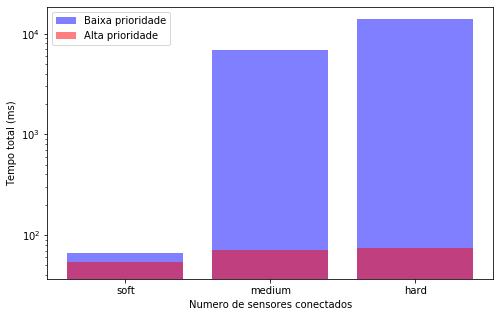

In [21]:
r0 = media(file = './result/teste 4', tempo='total', prioridade=0)
r1 = media(file = './result/teste 4', tempo='total', prioridade=1)
r2 = media(file = './result/teste 5', tempo='total', prioridade=0)
r3 = media(file = './result/teste 5', tempo='total', prioridade=1)
r4 = media(file = './result/teste 6', tempo='total', prioridade=0)
r5 = media(file = './result/teste 6', tempo='total', prioridade=1)

objects = ['soft','medium','hard',]
y_pos = np.arange(3)
priorityResults = [x for x in [r0, r2,r4]]
nopriorityResults = [x for x in [r1,r3,r5]]
plt.figure(figsize=(8,5))
plt.bar(y_pos, nopriorityResults, align='center',color='b', alpha=0.5, log='True')
plt.bar(y_pos, priorityResults, align='center',color='r', alpha=0.5, log='True')
plt.xticks(y_pos, objects)
plt.ylabel('Tempo total (ms)')
plt.xlabel('Numero de sensores conectados')
plt.legend(('Baixa prioridade', 'Alta prioridade'))
plt.show()

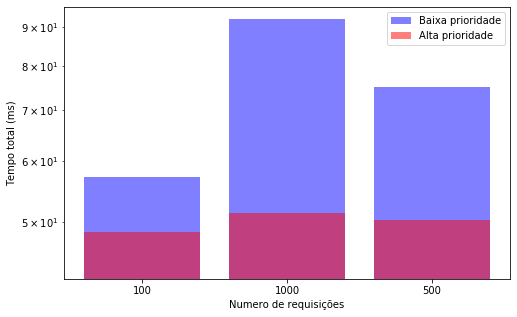

In [25]:
r0 = media(file = './result/teste 31', tempo='total', prioridade=0)
r1 = media(file = './result/teste 31', tempo='total', prioridade=1)
r2 = media(file = './result/teste 32', tempo='total', prioridade=0)
r3 = media(file = './result/teste 32', tempo='total', prioridade=1)
r4 = media(file = './result/teste 33', tempo='total', prioridade=0)
r5 = media(file = './result/teste 33', tempo='total', prioridade=1)

objects = ['100','1000','500',]
y_pos = np.arange(3)
priorityResults = [x for x in [r0, r2,r4]]
nopriorityResults = [x for x in [r1,r3,r5]]
plt.figure(figsize=(8,5))
plt.bar(y_pos, nopriorityResults, align='center',color='b', alpha=0.5, log='True')
plt.bar(y_pos, priorityResults, align='center',color='r', alpha=0.5, log='True')
plt.xticks(y_pos, objects)
plt.ylabel('Tempo total (ms)')
plt.xlabel('Numero de requisições')
plt.legend(('Baixa prioridade', 'Alta prioridade'))
plt.show()